Now the model has been trained, and what's next is the post-hoc analysis of performance. In particular, does it at least predict % changes of the correct sign? If it can do that correctly, this model is bad, but at least useful.

Load model
Load test data

FP, see what predictions are

Compare

In [1]:
import sys
sys.path.append('../src')

In [46]:
from train import CryptoTrainer
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
trader = CryptoTrainer.load_from_checkpoint("/Users/noahkasmanoff/Desktop/F21/jetcoin/src/uncategorized/l1h8tjje/checkpoints/epoch=28-step=986.ckpt")

In [48]:
from dataloaders import create_dataloaders

In [49]:
train_loader, valid_loader, test_loader, today_loader = create_dataloaders(crypto='bitcoin',values='usd',batch_size=1,labels_to_load=['pct_change'],
                                                            
                                                            prior_years = 1, window = 28, buy_thresh=5)

In [50]:
for price, pct_change in today_loader:
    trader.forward(price).item()

In [51]:
price, pct_change

(tensor([[-1.7390, -2.3159, -1.7784, -1.7950,  0.2357, -0.0642,  0.1307,  0.3331,
           1.4983,  2.3000,  0.5770, -0.1277,  0.1253, -0.0607,  0.8973, -0.3259,
          -1.2410, -0.2497,  0.4568,  0.2489,  0.0786, -0.0846,  0.9061,  0.8519,
           0.1391, -0.0261,  0.1669,  0.8623]]),
 tensor([[nan]]))

In [52]:
trader.forward(price)

tensor([[0.0536]], grad_fn=<AddmmBackward>)

In [53]:
pct_change

tensor([[nan]])

In [54]:
trader.eval();

In [55]:
trader.forward(price)

tensor([[0.0536]], grad_fn=<AddmmBackward>)

In [56]:
y_pred = []
y_true = []
trader.eval();

with torch.no_grad():
    for price, pct_change in today_loader:

#        print(trader.forward(price).item(),'||', pct_change.item())
        y_pred.append(trader.forward(price).item())
        y_true.append(pct_change.item())

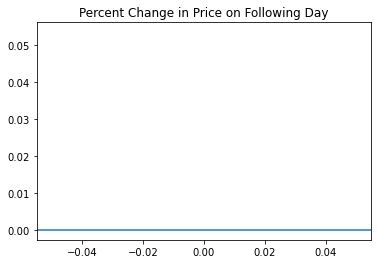

In [57]:
plt.title("Percent Change in Price on Following Day")
plt.plot(y_pred,label='predicted')
plt.plot(y_true,label='true')
plt.axhline()

Graph notes... 

What about today? 

In [33]:
sys.path.append('../dat/')
from collect_and_prepare_data import prepare_data

In [34]:
_, _, coin_test = prepare_data(prior_years=5,crypto='bitcoin',values='usd', buy_thresh = .05, window = 28)

ValueError: too many values to unpack (expected 3)

In [ ]:
coin_test[-1]['date']

In [ ]:
trader.forward(torch.Tensor(coin_test[-1]['prices']).unsqueeze(0))

In [ ]:
def get_today_input():
    """
    Return the input for today's price history for the predicted pct_change. 
    """
    
    

In [ ]:

    cg = CoinGeckoAPI()

    today = cg.get_price(ids='bitcoin', vs_currencies='usd',include_last_updated_at=True)['bitcoin']['last_updated_at']
    start = int(today - prior_years*31536000) # subtract prior years


    btc_history = cg.get_coin_market_chart_range_by_id(id=crypto,vs_currency=values,include_market_cap='true',from_timestamp= start,to_timestamp=today)
    prices = np.array(btc_history['prices'])
    timestamps = prices[:,0]
    price = prices[:,1]
    dates = [datetime.fromtimestamp(timestamp // 1000) for timestamp in timestamps]
    cg_df = pd.DataFrame()
    cg_df['timestamp'] = timestamps
    cg_df['date'] = dates
    cg_df[crypto + '_price'] = price

In [ ]:
from datetime import datetime
from pycoingecko import CoinGeckoAPI
import numpy as np
import pandas as pd

In [ ]:
cg = CoinGeckoAPI()

today = cg.get_price(ids='bitcoin', vs_currencies='usd',include_last_updated_at=True)['bitcoin']['last_updated_at']
start = int(today - 5*31536000) # subtract prior years
crypto='bitcoin'

In [ ]:

btc_history = cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency='usd',include_market_cap='true',from_timestamp= start,to_timestamp=today)
prices = np.array(btc_history['prices'])
timestamps = prices[:,0]
price = prices[:,1]
dates = [datetime.fromtimestamp(timestamp // 1000) for timestamp in timestamps]
cg_df = pd.DataFrame()
cg_df['timestamp'] = timestamps
cg_df['date'] = dates
cg_df[crypto + '_price'] = price


In [ ]:
coin_df = cg_df

In [ ]:
window = 28
coin_df['moving_avg'] = coin_df['bitcoin_price'].rolling(window=window).mean().shift(1) # for day i, computes the window rolling average for the prior i-1 to i-1-window days.
coin_df['pct_change'] =  (coin_df['bitcoin_price'] - coin_df['moving_avg']) / coin_df['moving_avg']


In [ ]:
coin_df.loc[coin_df['date'].astype(str).str.contains('2021-01-01')]

In [ ]:
i = 3
prices = coin_df['bitcoin_price'].values[i-window:i]

In [ ]:
prices

In [ ]:
coin_df

In [ ]:
coin_df.loc[coin_df['pct_change'] == coin_test[-1]['pct_change']]

In [ ]:
i = 364
prices = coin_df['bitcoin_price'].values[i-window:i]

In [ ]:
prices

In [ ]:
pct_change = coin_df['pct_change'].values[i]

In [ ]:
pct_change

In [ ]:
coin_test[-1]

In [ ]:
coin_df

In [ ]:
coin_df['bitcoin_price'].values[coin_df.shape[0]-window:coin_df.shape[0]+1]